In [1]:
from keras.models import load_model
import torch
import matplotlib.pyplot as plt

In [2]:
from resnet import ResNet

In [3]:

import torch
import torch.nn as nn

# class TempModel(nn.Module):
#     def __init__(self):
#         super(TempModel, self).__init__()
#         self.conv1 = nn.Conv2d(3, 5, (3, 3))
#     def forward(self, inp):
#         return self.conv1(inp)

model = ResNet()
model.load_state_dict(torch.load(r'C:\Users\acer\Desktop\Garbage Automation\New\model.h5', map_location = 'cpu'))
model.eval()

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [4]:
import numpy as np 
import serial
import time

In [5]:
from keras.preprocessing import image 

'plastic'

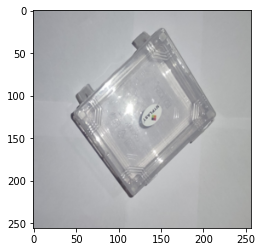

In [11]:
test_image = image.load_img(r'C:\Users\acer\Desktop\Garbage Automation\New\cardboard22.jpg', target_size = (256,256))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# xb = to_device(img.unsqueeze(0), device)
# yb = model(test_image)
#     # Pick index with highest probability
#     prob, preds  = torch.max(yb, dim=1)
# result = model.predict(test_image)
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0]]
def predict_external_image(image_name,model):
    image = Image.open(image_name)

    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))
    #rint("The image resembles", predict_image(example_image,model))
    return predict_image(example_image, model)
    
#predict_external_image(r'C:\Users\acer\Desktop\Garbage Automation\New\sam3.jpeg', model)
#predict_external_image(r'C:\Users\acer\Desktop\Garbage Automation\New\sprite.jpeg', model)

#predict_external_image(r'C:\Users\acer\Desktop\Garbage Automation\New\myplastic.jpeg', model)
predict_external_image(r'C:\Users\acer\Desktop\Garbage Automation\New\mypaper2.jpeg', model)

print(result)

plastic


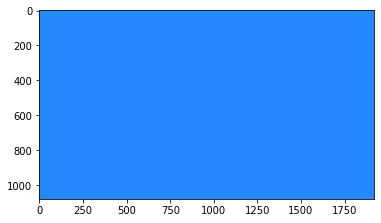

plastic


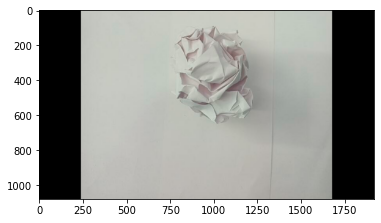

paper


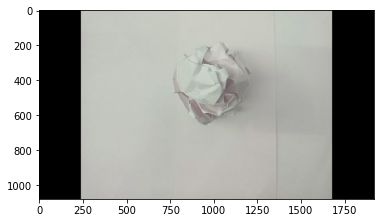

plastic


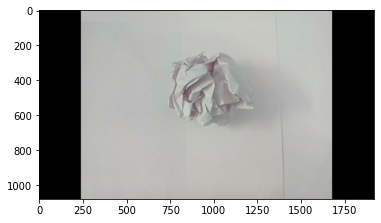

trash


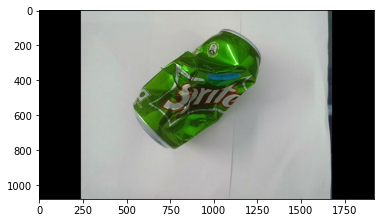

metal


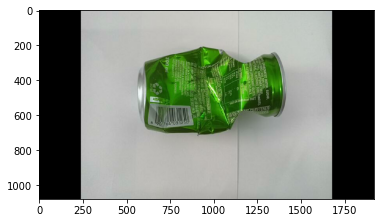

In [7]:
import cv2 as cv
import numpy as np
import os 
import pyautogui
import time
import serial


cap = cv.VideoCapture(1)
img_count = 1
serialcomm = serial.Serial('COM13',9600)
while True:
    success, frame = cap.read()
    
    
    if not success:
        print("unable to read frame")
    inp = input()
    if inp == 'd':
        is_img_write = cv.imwrite(fr"C:\Users\acer\Desktop\Garbage Automation\garbage_Images\image{img_count}.bmp", frame)
        
        print(predict_external_image(fr"C:\Users\acer\Desktop\Garbage Automation\garbage_Images\image{img_count}.bmp", model))
        
        inpp = predict_external_image(fr"C:\Users\acer\Desktop\Garbage Automation\garbage_Images\image{img_count}.bmp", model)
        serialcomm.write(inpp.encode())
        time.sleep(0.5)
            
        img_count+=1
        plt.imshow(frame)
        plt.show()
        